#online

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We open the main file to analyse what the data are and how they are sorted
bc_df = pd.read_csv('MAIN_EN_Berlin_bike_thief_file_for_analysis.csv')
bc_df.head()

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-12-01,1,12,2022,2022-12-01,8,2022-12-01,8,1300836,506,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest
1,2022-12-01,1,12,2022,2022-11-29,22,2022-11-30,17,1300732,718,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße
2,2022-12-01,1,12,2022,2022-05-28,7,2022-05-28,14,6300526,569,No,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
3,2022-12-01,1,12,2022,2022-11-21,9,2022-11-21,16,1100309,600,No,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße
4,2022-12-01,1,12,2022,2022-11-30,16,2022-12-01,11,3701659,400,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße


In [3]:
lor_df = pd.read_csv('Berlin_LOR_code.csv')

In [4]:
# to avoid any issue by reading the german special character we encode it to 'latin-1' to change them, and then re-encode it 'utf-8'
bc2_df = pd.read_csv('Fahrraddiebstahl_U.csv', encoding='latin-1')
bc2_df.to_csv('TEST ENCODE.csv', index=False)

In [5]:
bcUpd_df = pd.read_csv('TEST ENCODE.csv', encoding='utf-8')
bcUpd_df.to_csv('Fahrraddiebstahl_Final.csv', index=False)

In [6]:
bcUpd_df.info()
#bc_updt = bc2_df[~(df['date'] < '2018-04-01')]
bcUpd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23959 entries, 0 to 23958
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANGELEGT_AM            23959 non-null  object
 1   TATZEIT_ANFANG_DATUM   23959 non-null  object
 2   TATZEIT_ANFANG_STUNDE  23959 non-null  int64 
 3   TATZEIT_ENDE_DATUM     23959 non-null  object
 4   TATZEIT_ENDE_STUNDE    23959 non-null  int64 
 5   LOR                    23959 non-null  int64 
 6   SCHADENSHOEHE          23959 non-null  int64 
 7   VERSUCH                23959 non-null  object
 8   ART_DES_FAHRRADS       23959 non-null  object
 9   DELIKT                 23959 non-null  object
 10  ERFASSUNGSGRUND        23959 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
0,05.02.2023,05.02.2023,8,05.02.2023,8,11200514,0,Nein,Mountainbike,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
1,05.02.2023,04.02.2023,10,04.02.2023,11,1300730,372,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2,05.02.2023,05.02.2023,6,05.02.2023,9,6300632,749,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
3,05.02.2023,04.02.2023,12,05.02.2023,8,12100205,350,Nein,Herrenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
4,05.02.2023,04.02.2023,16,05.02.2023,13,2500728,1500,Nein,Damenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...


# Standardizing

We start by unifying the date in the european format

In [7]:
bc_df['Record_date'] = pd.to_datetime(bc_df['Record_date'])
bc_df['Stealing_date'] = pd.to_datetime(bc_df['Stealing_date'])
bc_df['Report_stealing_date'] = pd.to_datetime(bc_df['Report_stealing_date'])

bc_df.head()

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-12-01,1,12,2022,2022-12-01,8,2022-12-01,8,1300836,506,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest
1,2022-12-01,1,12,2022,2022-11-29,22,2022-11-30,17,1300732,718,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße
2,2022-12-01,1,12,2022,2022-05-28,7,2022-05-28,14,6300526,569,No,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
3,2022-12-01,1,12,2022,2022-11-21,9,2022-11-21,16,1100309,600,No,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße
4,2022-12-01,1,12,2022,2022-11-30,16,2022-12-01,11,3701659,400,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße


In [8]:
bcUpd_df['ANGELEGT_AM'] = pd.to_datetime(bcUpd_df['ANGELEGT_AM'])
bcUpd_df['TATZEIT_ANFANG_DATUM'] = pd.to_datetime(bcUpd_df['TATZEIT_ANFANG_DATUM'])
bcUpd_df['TATZEIT_ENDE_DATUM'] = pd.to_datetime(bcUpd_df['TATZEIT_ENDE_DATUM'])

/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31.01.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30.01.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '29.01.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '28.01.2023

We now unify the columns of "Fahrraddiebstahl_U.csv" which is the updated records to be then concatenate to the main file "bc_df".

By looking at the columns of both files we will adapt to the main file column which is bc_df.

Green column : original data provided by the berliner police department<br />
Blue column : addition for date precision<br />
Orang column : TEMPORAR, addition for the real steal dates<br />
White column : TEMPORAR, need investigation<br />

The under line, represent the data we will use to find the info of the upper one<br />
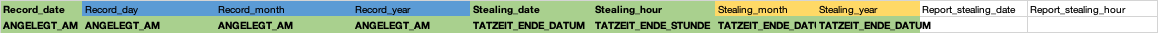


In [9]:
# Creating a separate file to implemente the updates
bc_df_final = bc_df[['Record_date', 'Record_day', 'Record_month', 'Record_year',
       'Stealing_date', 'Stealing_hour', 'Report_stealing_date',
       'Report_stealing_hour', 'Berlin_code_area', 'Bike_value',
       'Unsuccesful_attempt', 'Bike_type', 'Crime_type', 'Crime_reason',
       'Administrative_district', 'District', 'Quarter', 'Street_name']].copy()

We enriche the dates and time by the months and years to add more futur filtering possibilities :


In [10]:
# using function pd.DatetimeIndex to extract the month and the year from a date.
bc_df_final["stealing_month"] = pd.DatetimeIndex(bc_df_final['Stealing_date']).month
bc_df_final["stealing_year"] = pd.DatetimeIndex(bc_df_final['Stealing_date']).year
bc_df_final["Stealing_day"] = pd.DatetimeIndex(bc_df_final['Stealing_date']).day
bc_df_final.head()

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,...,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name,stealing_month,stealing_year,Stealing_day
0,2022-12-01,1,12,2022,2022-12-01,8,2022-12-01,8,1300836,506,...,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest,12,2022,1
1,2022-12-01,1,12,2022,2022-11-29,22,2022-11-30,17,1300732,718,...,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße,11,2022,29
2,2022-12-01,1,12,2022,2022-05-28,7,2022-05-28,14,6300526,569,...,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte,5,2022,28
3,2022-12-01,1,12,2022,2022-11-21,9,2022-11-21,16,1100309,600,...,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße,11,2022,21
4,2022-12-01,1,12,2022,2022-11-30,16,2022-12-01,11,3701659,400,...,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße,11,2022,30


**Translation**
We rename and translate the column and their value in english 

In [23]:
bcUpd_df.columns

Index(['Record_date', 'Report_stealing_date', 'Report_stealing_hour',
       'Stealing_date', 'Stealing_hour', 'Berlin_code_area', 'Bike_value',
       'Unsuccesful_attempt', 'Bike_type', 'Crime_type', 'Crime_reason',
       'stealing_month', 'stealing_year', 'stealing_day'],
      dtype='object')

In [63]:
bc_df_final['Crime_type'].unique()

array(['Theft', 'Break-in'], dtype=object)

In [62]:
bcUpd_df['Crime_type'].unique()

array(['Keller- und Bodeneinbruch', 'Fahrraddiebstahl'], dtype=object)

In [39]:
bcUpd_df['Unsuccesful_attempt'].astype(str)

0        Nein
1        Nein
2        Nein
3        Nein
4        Nein
         ... 
23620    Nein
23621    Nein
23622    Nein
23623    Nein
23624    Nein
Name: Unsuccesful_attempt, Length: 2936, dtype: object

In [61]:
bcUpd_df['Unsuccesful_attempt'] = bcUpd_df['Unsuccesful_attempt'].replace('Nein', "No")
bcUpd_df['Unsuccesful_attempt'] = bcUpd_df['Unsuccesful_attempt'].replace('Ja', "Yes")
bcUpd_df['Unsuccesful_attempt'] = bcUpd_df['Unsuccesful_attempt'].replace('Unbekannt', "Unknown")

In [56]:
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Mountainbike', "Mountain")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Fahrrad', "Bike")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Herrenfahrrad', "Men")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Damenfahrrad', "Women")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Rennrad', "Racing")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('diverse Fahrräder', "various Bike")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Kinderfahrrad', "Child")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Lastenfahrrad', "Cargo")

In [64]:
bcUpd_df['Crime_type'] = bcUpd_df['Crime_type'].replace('Keller- und Bodeneinbruch', "Break-in")
bcUpd_df['Crime_type'] = bcUpd_df['Crime_type'].replace('Fahrraddiebstahl', "Theft")

In [ ]:
bcUpd_df['Crime_type'] = bcUpd_df['Crime_type'].replace('Keller- und Bodeneinbruch', "Break-in")
bcUpd_df['Crime_type'] = bcUpd_df['Crime_type'].replace('Fahrraddiebstahl', "Theft")

In [11]:
bcUpd_df.rename(columns={'ANGELEGT_AM': 'Record_date', 'TATZEIT_ANFANG_DATUM': 'Report_stealing_date', 'TATZEIT_ANFANG_STUNDE': 'Report_stealing_hour', 'TATZEIT_ENDE_DATUM': 'Stealing_date', 'TATZEIT_ENDE_STUNDE': 'Stealing_hour', 'LOR': 'Berlin_code_area', 'SCHADENSHOEHE': 'Bike_value', 'VERSUCH': 'Unsuccesful_attempt', 'ART_DES_FAHRRADS': 'Bike_type', 'DELIKT': 'Crime_type', 'ERFASSUNGSGRUND': 'Crime_reason'}, inplace=True)
bcUpd_df.head()

,Record_date,Report_stealing_date,Report_stealing_hour,Stealing_date,Stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason
0,2023-05-02,2023-05-02,8,2023-05-02,8,11200514,0,Nein,Mountainbike,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
1,2023-05-02,2023-04-02,10,2023-04-02,11,1300730,372,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2,2023-05-02,2023-05-02,6,2023-05-02,9,6300632,749,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
3,2023-05-02,2023-04-02,12,2023-05-02,8,12100205,350,Nein,Herrenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
4,2023-05-02,2023-04-02,16,2023-05-02,13,2500728,1500,Nein,Damenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...


#We add the goegraphical columns
#pd.merge
on = the pivot column

#join
bc_df_final['ADDED_COLUMN2'] = data_1['ACCOUNT_NAME'].str.split(' ').apply(lambda x: x[0]+'_Group')

lor_df

We now adapt the date format of Record_date from bcUpd_df to fit with the bc_df_final one.
And we precise the dates and time<br />
- Record_day/Record_month/Record_year<br />
- Stealing_month	Stealing_year

In [12]:
bcUpd_df["stealing_month"] = pd.DatetimeIndex(bcUpd_df['Stealing_date']).month
bcUpd_df["stealing_year"] = pd.DatetimeIndex(bcUpd_df['Stealing_date']).year
bcUpd_df["stealing_day"] = pd.DatetimeIndex(bcUpd_df['Stealing_date']).day
bcUpd_df.head()

,Record_date,Report_stealing_date,Report_stealing_hour,Stealing_date,Stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,stealing_month,stealing_year,stealing_day
0,2023-05-02,2023-05-02,8,2023-05-02,8,11200514,0,Nein,Mountainbike,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...,5,2023,2
1,2023-05-02,2023-04-02,10,2023-04-02,11,1300730,372,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,4,2023,2
2,2023-05-02,2023-05-02,6,2023-05-02,9,6300632,749,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,5,2023,2
3,2023-05-02,2023-04-02,12,2023-05-02,8,12100205,350,Nein,Herrenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...,5,2023,2
4,2023-05-02,2023-04-02,16,2023-05-02,13,2500728,1500,Nein,Damenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...,5,2023,2


We remove the record older than the update (2022-12-01)

In [13]:
bcUpd_df = bcUpd_df[~(bcUpd_df['Record_date'] < '2022-12-01')]

In [18]:
bcUpd_df.columns

Index(['Record_date', 'Report_stealing_date', 'Report_stealing_hour',
       'Stealing_date', 'Stealing_hour', 'Berlin_code_area', 'Bike_value',
       'Unsuccesful_attempt', 'Bike_type', 'Crime_type', 'Crime_reason',
       'stealing_month', 'stealing_year', 'stealing_day'],
      dtype='object')

The data now fits in terms of name and date. We can concatenate both files :

In [14]:
bc_df_final = pd.concat([bc_df_final,bcUpd_df], axis=0)
# We save it to a final .CSV file
#bc_df_final.to_csv("Final.csv",index=False)

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,...,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name,stealing_month,stealing_year,Stealing_day,stealing_day
0,2022-12-01,1.0,12.0,2022.0,2022-12-01,8,2022-12-01,8,1300836,506,...,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest,12,2022,1.0,NaN
1,2022-12-01,1.0,12.0,2022.0,2022-11-29,22,2022-11-30,17,1300732,718,...,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße,11,2022,29.0,NaN
2,2022-12-01,1.0,12.0,2022.0,2022-05-28,7,2022-05-28,14,6300526,569,...,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte,5,2022,28.0,NaN
3,2022-12-01,1.0,12.0,2022.0,2022-11-21,9,2022-11-21,16,1100309,600,...,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße,11,2022,21.0,NaN
4,2022-12-01,1.0,12.0,2022.0,2022-11-30,16,2022-12-01,11,3701659,400,...,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße,11,2022,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23620,2022-12-01,NaN,NaN,NaN,2022-12-01,7,2022-11-01,15,1300733,600,...,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN,12,2022,NaN,1.0
23621,2022-12-01,NaN,NaN,NaN,2022-11-01,23,2022-11-01,21,2300315,3200,...,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN,11,2022,NaN,1.0
23622,2022-12-01,NaN,NaN,NaN,2022-12-01,6,2022-11-01,18,5200423,499,...,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN,12,2022,NaN,1.0
23623,2022-12-01,NaN,NaN,NaN,2022-10-01,15,2022-10-01,14,6400844,419,...,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN,10,2022,NaN,1.0
